## Encoder and Decoder using Autoencoder

![](img/autoencoder_schema.jpg)

In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


Normalize all values between 0 and 1

In [0]:

x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.


In [3]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Flatten the 28x28 images into vectors of size 784.


In [4]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


#### Fully-connected neural layer as encoder and as decoder:

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

In [0]:
# The size of encoded and actual representations

encoding_dim = 32 

img_dim = x_train.shape[1] #784

In [0]:
# Input placeholder
input_img = Input(shape=(img_dim,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(img_dim, activation='sigmoid')(encoded)

In [0]:
# this model maps an input to its reconstruction

autoencoder = Model(input_img, decoded)

In [10]:
print(autoencoder.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


### Create a separate encoder model

In [0]:
# this model maps an input to its encoded representation

encoder = Model(input_img, encoded)

In [12]:
print(encoder.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


### Create a separate decoder model

In [0]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1](encoded_input)

# create the decoder model
decoder = Model(encoded_input, decoder_layer)

In [14]:
print(decoder.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
None


Configure the model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:

In [15]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train our autoencoder for 50 epochs:

In [16]:
training_history = autoencoder.fit(x_train, x_train, epochs=50,
                                   batch_size=256, shuffle=True,
                                   validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 6s 101us/step - loss: 0.3532 - acc: 0.7550 - val_loss: 0.2693 - val_acc: 0.7955
Epoch 2/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2604 - acc: 0.7973 - val_loss: 0.2482 - val_acc: 0.7962
Epoch 3/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.2380 - acc: 0.7969 - val_loss: 0.2260 - val_acc: 0.7959
Epoch 4/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2191 - acc: 0.7973 - val_loss: 0.2101 - val_acc: 0.7971
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2057 - acc: 0.7984 - val_loss: 0.1986 - val_acc: 0.7984
Epoch 6/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1953 - acc: 0.7998 - val_loss: 0.1893 - val_acc: 0.8005
Epoch 7/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1867 - acc: 0.8010 - val_loss: 0.1816 

### Visualize the training of our Neural Network

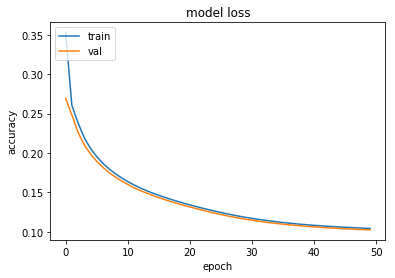

In [20]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

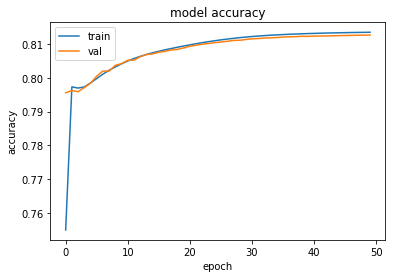

In [22]:
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Visualize the reconstructed inputs and the encoded representations using Matplotlib.

In [0]:
# Note that we take them from the *test* set

encoded_imgs = encoder.predict(x_test)

decoded_imgs = decoder.predict(encoded_imgs)

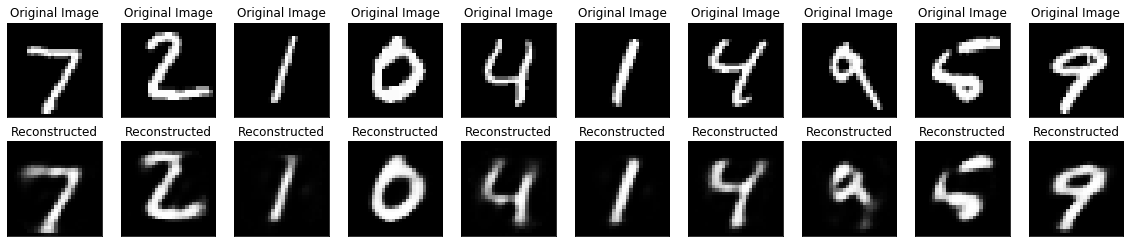

In [24]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original Image')
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Reconstructed')

plt.show()

### T-SNE visualisation of data

In [1]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter=300)

In [28]:
tsne_encoded = tsne.fit_transform(encoded_imgs)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.020s...
[t-SNE] Computed neighbors for 10000 samples in 6.920s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.817269
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.412003
[t-SNE] KL divergence after 300 iterations: 2.819902


In [29]:
tsne_test = tsne.fit_transform(x_test.reshape(x_test.shape[0], -1))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.804s...
[t-SNE] Computed neighbors for 10000 samples in 178.211s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.129212
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.904510
[t-SNE] KL divergence after 300 iterations: 2.779880


In [0]:
import seaborn as sns
import matplotlib.patheffects as PathEffects

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-7.6509466, 3.95816, '0'),
  Text(6.866568, 3.2615252, '1'),
  Text(1.844493, 7.123336, '2'),
  Text(-1.8137294, 4.2373576, '3'),
  Text(0.59295297, -5.984849, '4'),
  Text(-3.0813468, -1.3657501, '5'),
  Text(-7.38751, -3.0861464, '6'),
  Text(6.676369, -4.7497425, '7'),
  Text(0.7127549, 0.8088552, '8'),
  Text(1.9241294, -6.3392706, '9')])

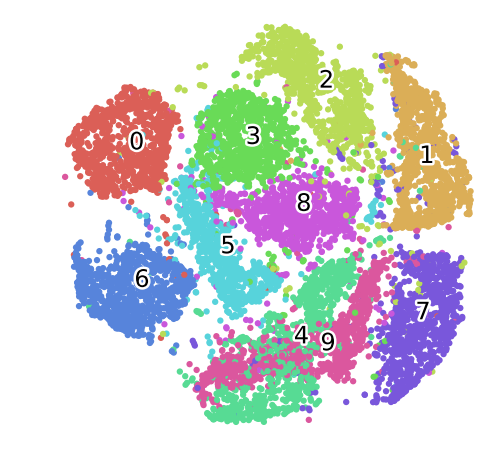

In [38]:
fashion_scatter(tsne_test, y_test)

(<Figure size 576x576 with 1 Axes>,
 [Text(-4.546097, -7.4294806, '0'),
  Text(7.4899454, 3.7338252, '1'),
  Text(6.773461, -2.29978, '2'),
  Text(1.1876504, -5.2342944, '3'),
  Text(-4.08118, 3.2614162, '4'),
  Text(-1.6917824, -2.0438364, '5'),
  Text(-7.4623165, -1.2759079, '6'),
  Text(1.378542, 7.734269, '7'),
  Text(2.9348402, -2.5694556, '8'),
  Text(-3.405317, 5.860409, '9')])

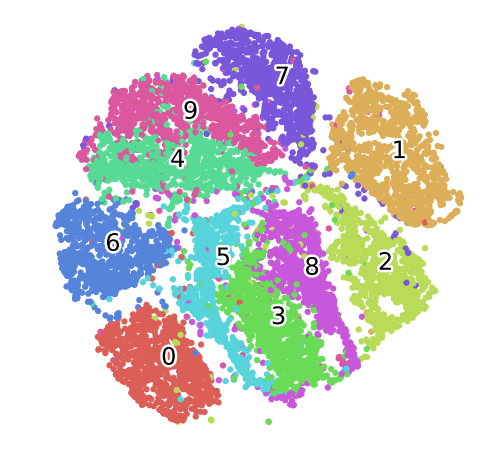

In [39]:
fashion_scatter(tsne_encoded, y_test)